In [137]:
'''
This contains code for generating "Evaluation of nearest explanation robustness to varying random perturbation size (percent of space)."

Experiment results files needed: Perturb

Results used in the paper are provided in "../results/final" if generating new results run each experiment and update the results paths below
'''
# path to each result file
results_path = "../results/perturbations_fig9.csv"

# path to output the figure
export_figures = True
output_dir = "./reproducability/"
fig_save_name = "perturbation_robustness_fig9"
fig_type = ".pdf"

In [138]:
import os
import re
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath("../"))
#from dataset import DS_NAMES
#from utilities.figure_tools import (get_latest_results_directory, load_results,
#                                   make_fig_directory)

cmap = plt.get_cmap("Set1")
colors = cmap.colors

if export_figures and not os.path.isdir(output_dir):
    os.makedirs(output_dir)
df = pd.read_csv(results_path)
df.head()

,iteration,explainer,dataset,instance,perturbation_size,nperturbations,per_valid
0,0,FACET,adult,41387,0.0001,100,1.0
1,0,FACET,adult,41387,0.0005,100,1.0
2,0,FACET,adult,41387,0.0010,100,1.0
3,0,FACET,adult,41387,0.0015,100,1.0
4,0,FACET,adult,41387,0.0020,100,1.0


In [139]:
all_results = df.groupby(["dataset", "explainer", "perturbation_size"], as_index=False).mean()
print("explainers:", list(all_results["explainer"].unique()))
print("datasets:", list(all_results["dataset"].unique()))
print("pert_sizes:", list(all_results["perturbation_size"].unique()))
all_results.head()

explainers: ['AFT', 'FACET', 'OCEAN']
datasets: ['adult', 'cancer', 'compas', 'credit', 'glass', 'magic', 'spambase', 'vertebral']
pert_sizes: [0.0001, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009, 0.0095, 0.01]


,dataset,explainer,perturbation_size,iteration,instance,nperturbations,per_valid
0,adult,AFT,0.0001,4.5,25372.7,100.0,0.818
1,adult,AFT,0.0005,4.5,25372.7,100.0,0.743
2,adult,AFT,0.0010,4.5,25372.7,100.0,0.718
3,adult,AFT,0.0015,4.5,25372.7,100.0,0.712
4,adult,AFT,0.0020,4.5,25372.7,100.0,0.709


In [140]:
# drop some values for clarity
idx_drop = (df["perturbation_size"].isin([2e-05, 3e-05, 4e-05, 5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 1e-05, 0.00011, 0.00012, 0.00013, 0.00014, 0.00015, 0.00016, 0.00017, 0.00018, 0.00019, 0.0002, 0.00021, 0.00022, 0.00023, 0.00024, 0.00026, 0.00027, 0.00028, 0.00029, 0.0003, 0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.00036, 0.00037, 0.00038, 0.00039, 0.0004, 0.00041, 0.00042, 0.00043, 0.00044, 0.00045, 0.00046, 0.00047, 0.00048, 0.00049, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.185, 0.19, 0.195, 0.2, 0.205, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.24, 0.245, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 0.45, 0.455, 0.46, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5, 0.0105, 0.011, 0.0115, 0.012, 0.0125, 0.013, 0.0135, 0.014, 0.0145, 0.015, 0.0155, 0.016, 0.0165, 0.017, 0.0175, 0.018, 0.0185, 0.019, 0.0195, 0.02, 0.0205, 0.021, 0.0215, 0.022, 0.0225, 0.023, 0.0235, 0.024, 0.0245, 0.025, 0.0255, 0.026, 0.0265, 0.027, 0.0275, 0.028, 0.0285, 0.029, 0.0295, 0.03, 0.0305, 0.031, 0.0315, 0.032, 0.0325, 0.033, 0.0335, 0.034, 0.0345, 0.035, 0.0355, 0.036, 0.0365, 0.037, 0.0375, 0.038, 0.0385, 0.039, 0.0395, 0.04, 0.0405, 0.041, 0.0415, 0.042, 0.0425, 0.043, 0.0435, 0.044, 0.0445, 0.045, 0.0455, 0.046, 0.0465, 0.047, 0.0475, 0.048, 0.0485, 0.049, 0.0495, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1]))
df = df.loc[~idx_drop]

In [141]:
all_results = df.groupby(["dataset", "explainer", "perturbation_size"], as_index=False).mean()
print("explainers:", list(all_results["explainer"].unique()))
print("datasets:", list(all_results["dataset"].unique()))
print("pert_sizes:", list(all_results["perturbation_size"].unique()))
all_results.head()

explainers: ['AFT', 'FACET', 'OCEAN']
datasets: ['adult', 'cancer', 'compas', 'credit', 'glass', 'magic', 'spambase', 'vertebral']
pert_sizes: [0.0001, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009, 0.0095, 0.01]


,dataset,explainer,perturbation_size,iteration,instance,nperturbations,per_valid
0,adult,AFT,0.0001,4.5,25372.7,100.0,0.818
1,adult,AFT,0.0005,4.5,25372.7,100.0,0.743
2,adult,AFT,0.0010,4.5,25372.7,100.0,0.718
3,adult,AFT,0.0015,4.5,25372.7,100.0,0.712
4,adult,AFT,0.0020,4.5,25372.7,100.0,0.709


In [142]:
# dataset1 = "compas"
# dataset2 = "glass"
# dataset3 = "vertebral"
# dataset4 = "magic"
# dataset5 = "spambase"

dataset1 = "adult"
dataset2 = "cancer"
dataset3 = "credit"
dataset4 = "magic"
dataset5 = "spambase"


cmap = plt.get_cmap("tab10")
colors = cmap.colors
marker_size = 10
line_width = 4
ds_colors = {
    dataset1: colors[0],
    dataset2: colors[1],
    dataset3: colors[2],
    #dataset4: colors[3],
    #dataset5: colors[4]
}
epl_colors = {
    "AFT": colors[0],
    "FACET": colors[1],
    "OCEAN": colors[2],
    "RFOCSE": colors[3],
    "MACE": colors[4]
}
explainer_markers = {
    "AFT": "o",
    "FACET": "^",
    "OCEAN": "s",
    "RFOCSE": "v",
    "MACE": "D"
}
marker_sizes = {
    "AFT": marker_size,
    "FACET": marker_size,
    "OCEAN": marker_size,
    "RFOCSE": marker_size,
    "MACE": marker_size
}
pretty_explainer_names = {
    "AFT": "AFT",
    "FACET": "FACET",
    "OCEAN": "OCEAN",
    "RFOCSE": "RFOCSE",
    "MACE": "MACE",
}
found_explainers = all_results["explainer"].unique()
all_explainers = ["FACET", "OCEAN", "MACE", "RFOCSE", "AFT"]
explainers = []
for expl in all_explainers:
    if expl in found_explainers:
        explainers.append(expl)

In [143]:
plot_fontsize = 20
figure_widths = [10, 12, 8]

def render_plot_ax(xfeature, yfeature, xlabel, ylabel, title, save_name=None, xrange=None, yrange=None, xlog=False, lloc=None, ylog=False, yticks_multi=None, yrange_multi=None, ytick_format="{:.2f}"):

    #datasets = all_results["dataset"].unique()
    datasets = [dataset1, dataset2, dataset3, dataset4, dataset5]
    #datasets = [dataset1, dataset2, dataset3]
    fig = plt.figure(figsize=[32, 4.5])
    #fig = plt.figure(figsize=[20, 4.5])
    ax = fig.subplots(nrows=1, ncols=5, sharex="all")
    #ax = fig.subplots(nrows=1, ncols=3, sharex="all")
    fig.subplots_adjust(left=0.2)


    
    xticks = np.arange(0, 1.01, 0.2)
    yticks = np.arange(0.1, 1.01, 0.2)
    xtick_labels = ["{:.1f}".format(_) for _ in xticks]
    ytick_labels = ["{:.1f}".format(_) for _ in yticks]
    
    for i in range(len(datasets)):
        ds = datasets[i]
        is_ds = all_results["dataset"] == ds
        for expl in explainers:
            is_expl = all_results["explainer"] == expl
            matching_rows = is_ds & is_expl
            ax[i].plot(all_results[matching_rows][xfeature] * 100, all_results[matching_rows][yfeature], label=expl, marker=explainer_markers[expl], lw=line_width, ms=marker_size)
            
            ax[i].tick_params(axis='both', which='major', labelsize=plot_fontsize)
            ax[i].set_xticks(xticks)
            ax[i].set_xticklabels(xtick_labels, fontdict={"horizontalalignment": "center"}, rotation=0)
            ax[i].set_title("({:s}) {:s}".format(chr(ord('a')+i), datasets[i].upper()), fontdict={"fontsize": plot_fontsize}) 
            ax[i].set_xlim(xrange)
            if yticks_multi is not None:
                ax[i].set_yticks(yticks_multi[i])
                ax[i].set_yticklabels([ytick_format.format(_) for _ in yticks_multi[i]])
            if yrange_multi is not None:
                bottom = yrange_multi[i][0]
                top = yrange_multi[i][1]
                if bottom is not None:
                    ax[i].set_ylim(bottom=bottom)
                if top is not None:
                    ax[i].set_ylim(top=top)

    ax[0].set_ylabel("Explanation Validity", fontsize=plot_fontsize)
    lines, labels = ax[0].get_legend_handles_labels()
    fig.subplots_adjust(wspace=0.2)
    legend_labels = [pretty_explainer_names[_] for _ in labels]
    fig.legend(lines, legend_labels, loc="upper center", bbox_to_anchor=(0.54, 1.11), handletextpad=0.5, columnspacing=1, handlelength=1.5, prop={"size": plot_fontsize}, ncol=len(legend_labels))
    fig.savefig(output_dir + save_name + fig_type, bbox_inches="tight", facecolor='w')


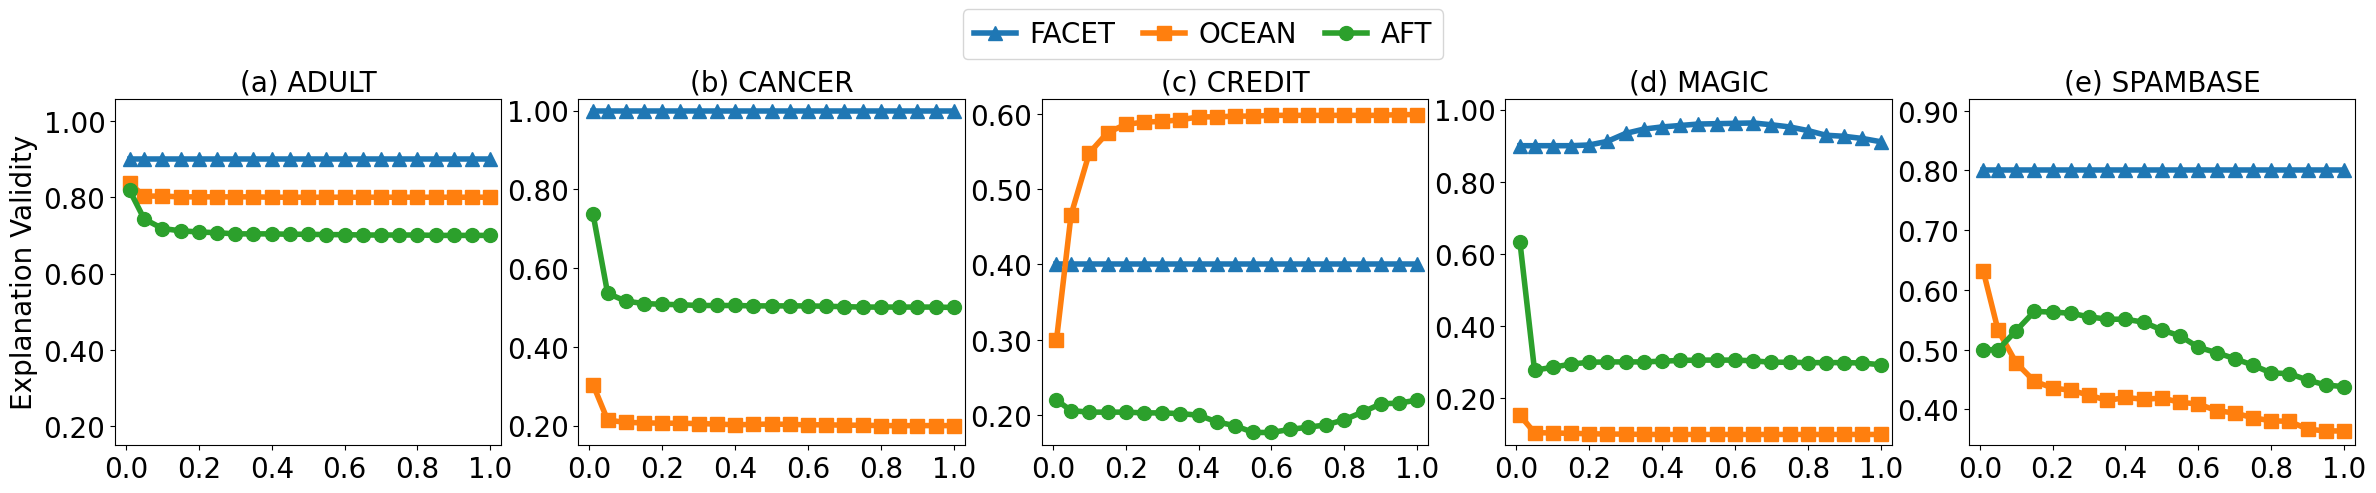

In [144]:
# yrange_multi = [[0.15, 1.05], [0.15, .83], [0.20, .68], [0.05, 1.05], [0.35, .92]]
# yticks_multi = [np.arange(0.2, 1.1, 0.2), np.arange(0.2, 1.1, 0.1), np.arange(.25, 1.1, 0.1), np.arange(0.2, 1.1, 0.2), np.arange(0.4, 0.91, 0.1)]

yrange_multi = [[0.15, 1.058], [0.15, 1.03], [0.16, .62], [0.07, 1.03], [0.34, 0.92]]
yticks_multi = [np.arange(0.2, 1.1, 0.2), np.arange(0.2, 1.3, 0.2), np.arange(0.2, 1.1, 0.1),
                np.arange(0.2, 1.1, 0.2), np.arange(0.4, 0.93, 0.1)]

render_plot_ax("perturbation_size", "per_valid", "Perturbation Size (% Space)", "Perturbed Validity", "Rate of Explanation Failure", save_name=fig_save_name, xrange=[-0.03, 1.03], yrange_multi=yrange_multi, yticks_multi=yticks_multi, ytick_format="{:.2f}")


In [145]:
# # group by cases
# df = pd.read_csv("../results/compare_methods_MinimalWorstGuess.csv")
# df.head()

In [146]:
# # group by case
# grouped = df.groupby(['case', 'dataset']).mean()
# grouped
# grouped.to_csv('../results/output_file.csv')